<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-258-Deep_Learning/blob/main/Assignment_04/a)_Neural_Network_numpy_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Imports & Data Preparation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import plotly.express as px


##Step 2: Generate Non-linear Data

In [2]:
def generate_data(num_samples=1000):
    x1 = np.random.uniform(-5, 5, num_samples)
    x2 = np.random.uniform(-5, 5, num_samples)
    x3 = np.random.uniform(-5, 5, num_samples)

    y = np.sin(x1) + np.cos(x2) + 0.5 * x3**2
    y = (y - np.min(y)) / (np.max(y) - np.min(y))

    X = np.vstack([x1, x2, x3]).T
    return X, y

X, y = generate_data()
X.shape, y.shape


((1000, 3), (1000,))

##Step 3: Visualization

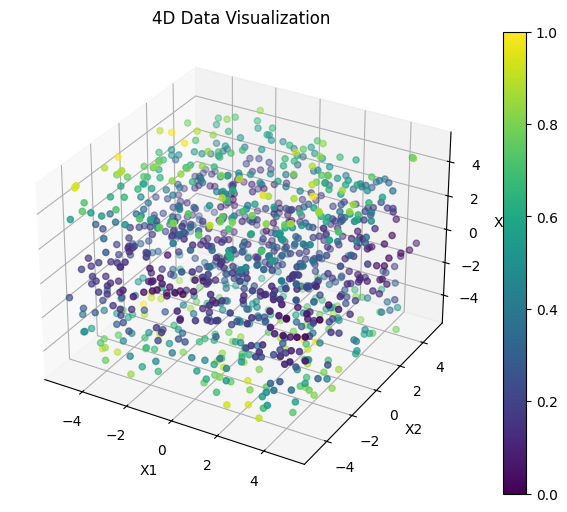

In [3]:
def plot_4d(X, y):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis')
    plt.colorbar(sc)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3')
    plt.title('4D Data Visualization')
    plt.show()

plot_4d(X, y)


In [4]:
def plotly_4d(X, y):
    df = pd.DataFrame(X, columns=['X1', 'X2', 'X3'])
    df['y'] = y
    fig = px.scatter_3d(df, x='X1', y='X2', z='X3', color='y', title='4D Data (Plotly)')
    fig.show()

plotly_4d(X, y)


##Step 4: Activation Functions

In [5]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

##Step 5: Initialize Parameters

In [6]:
def init_weights(input_dim, hidden1, hidden2, output_dim):
    np.random.seed(42)
    W1 = np.random.randn(input_dim, hidden1) * np.sqrt(2. / input_dim)
    b1 = np.zeros((1, hidden1))
    W2 = np.random.randn(hidden1, hidden2) * np.sqrt(2. / hidden1)
    b2 = np.zeros((1, hidden2))
    W3 = np.random.randn(hidden2, output_dim) * np.sqrt(2. / hidden2)
    b3 = np.zeros((1, output_dim))
    return W1, b1, W2, b2, W3, b3

# Setup dimensions
input_dim = 3
hidden_dim1 = 10
hidden_dim2 = 10
output_dim = 1

W1, b1, W2, b2, W3, b3 = init_weights(input_dim, hidden_dim1, hidden_dim2, output_dim)


## Step 6:  Forward Pass (Single Epoch Example)

In [7]:
y = y.reshape(-1, 1)

Z1 = X @ W1 + b1
A1 = relu(Z1)
Z2 = A1 @ W2 + b2
A2 = relu(Z2)
Z3 = A2 @ W3 + b3
y_pred = Z3

loss = np.mean((y_pred - y) ** 2)
print(f"Initial Loss (before training): {loss:.5f}")


Initial Loss (before training): 10.95186


Step 7: Training Loop with Manual Backpropagation

In [8]:
learning_rate = 0.01
num_epochs = 1000
loss_history = []

for epoch in range(num_epochs):
    # Forward pass
    Z1 = X @ W1 + b1
    A1 = relu(Z1)
    Z2 = A1 @ W2 + b2
    A2 = relu(Z2)
    Z3 = A2 @ W3 + b3
    y_pred = Z3

    # Loss
    loss = np.mean((y_pred - y) ** 2)
    loss_history.append(loss)

    # Backward pass
    dL_dy = 2 * (y_pred - y) / y.shape[0]
    dW3 = A2.T @ dL_dy
    db3 = np.sum(dL_dy, axis=0, keepdims=True)

    dA2 = dL_dy @ W3.T
    dZ2 = dA2 * relu_derivative(Z2)
    dW2 = A1.T @ dZ2
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = dZ2 @ W2.T
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = X.T @ dZ1
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # Update weights
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.5f}")


Epoch 0: Loss = 10.95186
Epoch 100: Loss = 0.05092
Epoch 200: Loss = 0.03355
Epoch 300: Loss = 0.02602
Epoch 400: Loss = 0.02207
Epoch 500: Loss = 0.01970
Epoch 600: Loss = 0.01800
Epoch 700: Loss = 0.01669
Epoch 800: Loss = 0.01561
Epoch 900: Loss = 0.01451


##Step 8: Plot Training Loss Curve

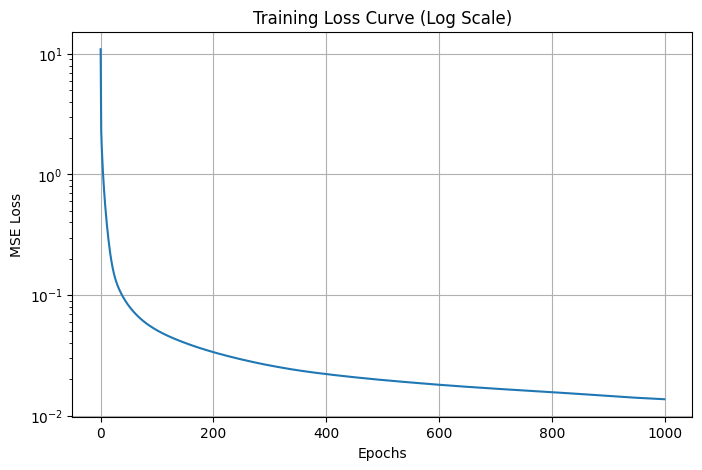

In [9]:
plt.figure(figsize=(8, 5))
plt.semilogy(loss_history)
plt.title("Training Loss Curve (Log Scale)")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()


## Step 9: Predict on New Data

In [10]:
def predict(X, W1, b1, W2, b2, W3, b3):
    A1 = relu(X @ W1 + b1)
    A2 = relu(A1 @ W2 + b2)
    return A2 @ W3 + b3

X_test, y_test = generate_data(100)
y_test = y_test.reshape(-1, 1)
y_pred_test = predict(X_test, W1, b1, W2, b2, W3, b3)

print("Sample predictions on new data:")
print(y_pred_test[:5])


Sample predictions on new data:
[[0.39262812]
 [0.56977725]
 [0.37375635]
 [0.49992897]
 [0.7230504 ]]


In [11]:
# Predict on test data
X_test, y_test = generate_data(100)
y_test = y_test.reshape(-1, 1)
y_pred_test = predict(X_test, W1, b1, W2, b2, W3, b3)

print("Sample predictions on new data:")
print(y_pred_test[:5])

Sample predictions on new data:
[[-0.03419257]
 [ 0.22509213]
 [ 0.51093732]
 [ 0.43146745]
 [ 0.15479124]]
